# 数据可视化作业题目

In [53]:
import numpy as np
import pandas as pd
import scipy as sp
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [15]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
flights_wide = data.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


In [37]:
year_passengers=data.groupby(data['year']) ['passengers'].sum()
year_passengers.index
type(year_passengers.values)
month_passengers=data.groupby(data['month']) ['passengers'].sum()
type(month_passengers)

C:\Users\Ultimator\AppData\Local\Temp\ipykernel_55940\2134706004.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_passengers=data.groupby(data['month']) ['passengers'].sum()


pandas.core.series.Series

C:\Users\Ultimator\AppData\Local\Temp\ipykernel_55940\1693381822.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_passengers=data.groupby(data['month']) ['passengers'].sum()


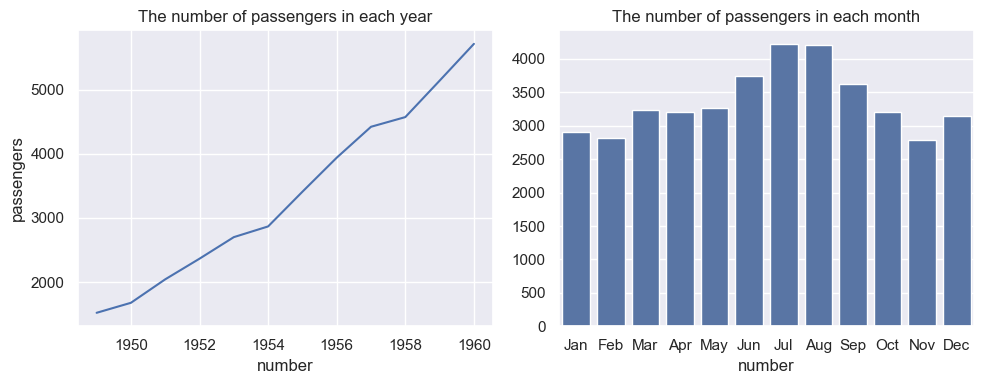

In [35]:
# 练习1
# 画两张图
f, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw=dict(width_ratios=[1, 1]))
# 采用groupby函数对数据进行分组，之后再sum对passengers求和
year_passengers=data.groupby(data['year']) ['passengers'].sum()
# 采用groupby函数对数据进行分组，之后再sum对passengers求和
month_passengers=data.groupby(data['month']) ['passengers'].sum()

# 绘制折线图
title = 'The number of passengers in each year'
x_label, y_label = 'year', 'number'
sns.lineplot(data=year_passengers, ax=axs[0])
axs[0].set_title(title), axs[0].set_xlabel(x_label), axs[0].set_xlabel(y_label)

# 绘制柱状图
title = 'The number of passengers in each month'
x_label, y_label = 'month', 'number'
sns.barplot(x=month_passengers.index, y=month_passengers.values, ax=axs[1])
axs[1].set_title(title), axs[1].set_xlabel(x_label), axs[1].set_xlabel(y_label)

f.tight_layout()

评论：
图左：每年的passengers数量稳中有进；
图右：每年Jul，Aug航班人数最多达到高峰，而在Dec与Jan会有个小峰，其余月份相对较少

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [80]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.02, 'The relationship between the sepal and petal')

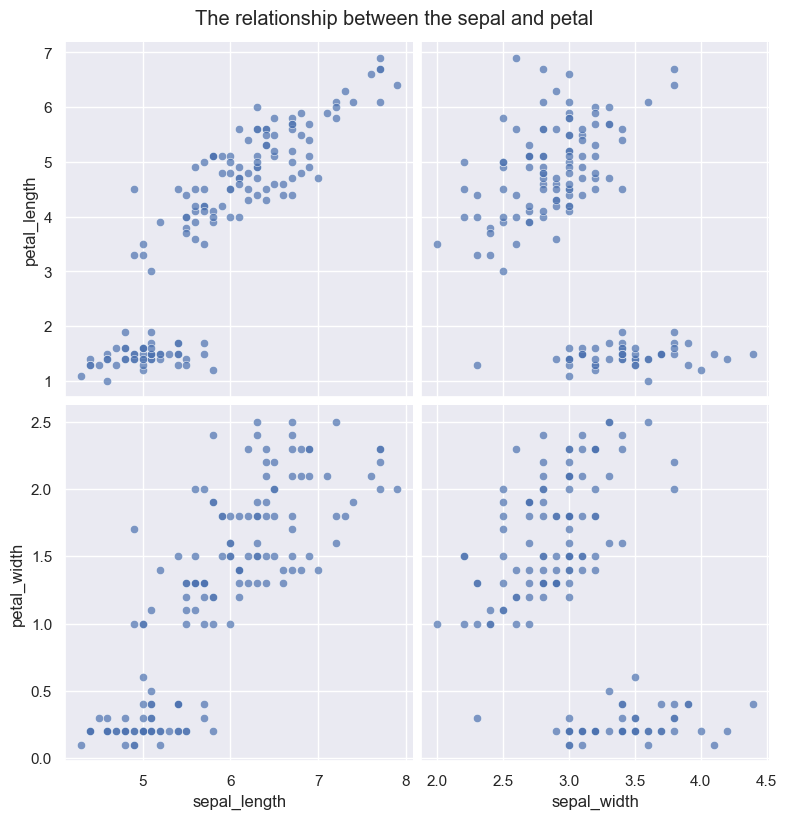

In [58]:
# 练习2-1
# 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
# 使用sns直接画出:
#   x_data = data['sepal_length'], y_data = data['petal_length']，
# 与x_data = data['sepal_length'], y_data = data['petal_width']
# 与x_data = data['sepal_width'] , y_data = data['petal_length']
# 与x_data = data['sepal_width'] , y_data = data['petal_width']
# 使用 pairplot 绘制四张图
sns.pairplot(data=data , x_vars=['sepal_length', 'sepal_width'],
             y_vars=['petal_length', 'petal_width'], 
             height=4, aspect=1, plot_kws={'alpha': 0.7})
plt.suptitle('The relationship between the sepal and petal', y =1.02)

评论：
s_l 与 p_l 以及 s_l 与 p_w 具有较高的线性关系；
而下面两图相关性不大；

Text(0.5, 1.02, 'The relationship between the sepal and petal')

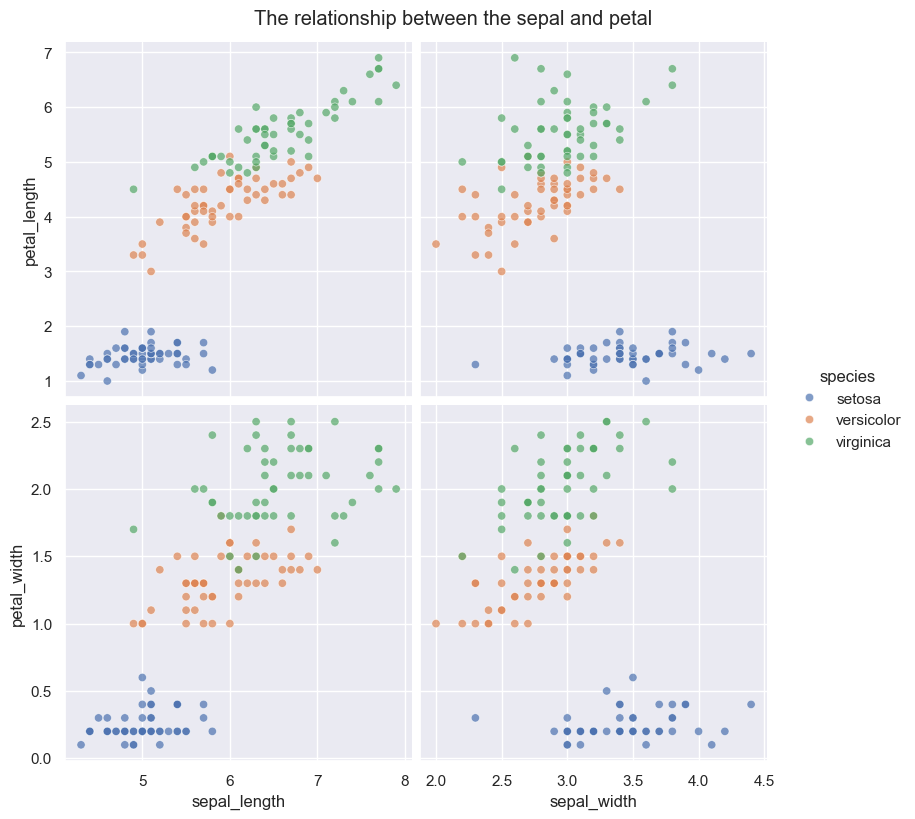

In [59]:
# 练习2-2
# 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
# 使用 pairplot 绘制四张图
sns.pairplot(data=data , x_vars=['sepal_length', 'sepal_width'],
             y_vars=['petal_length', 'petal_width'], 
             hue='species',
             height=4, aspect=1, plot_kws={'alpha': 0.7})
plt.suptitle('The relationship between the sepal, petal and species', y =1.02)

评论：
不做评论

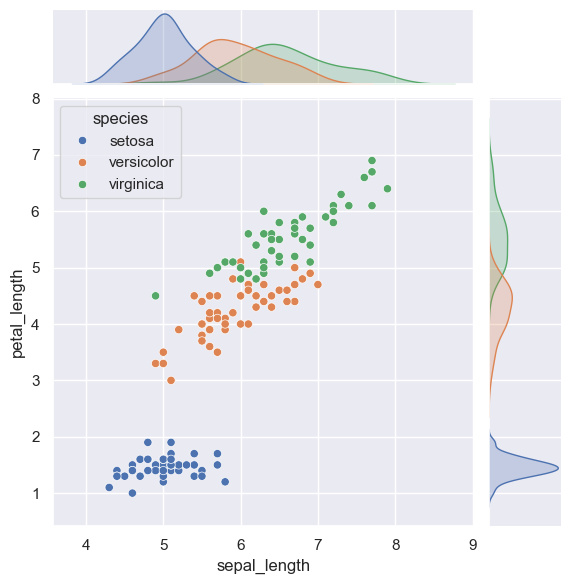

In [63]:
# 练习2-3
# 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）
sns.jointplot(data=data, x='sepal_length', y='petal_length', hue="species")

Text(0.5, 1.02, 'Virginica Species')

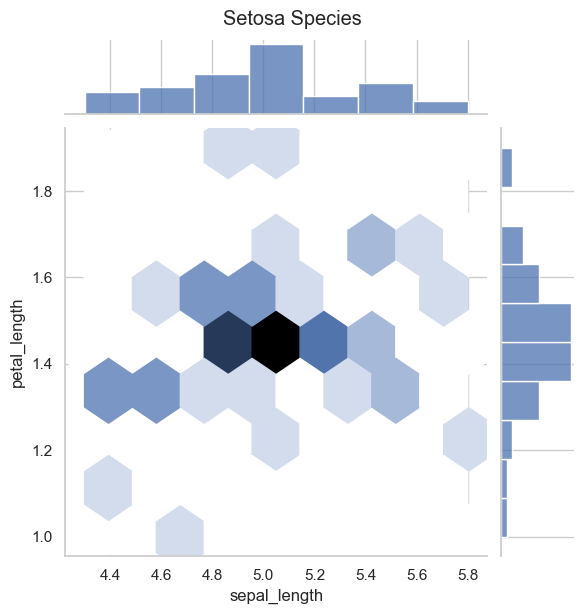

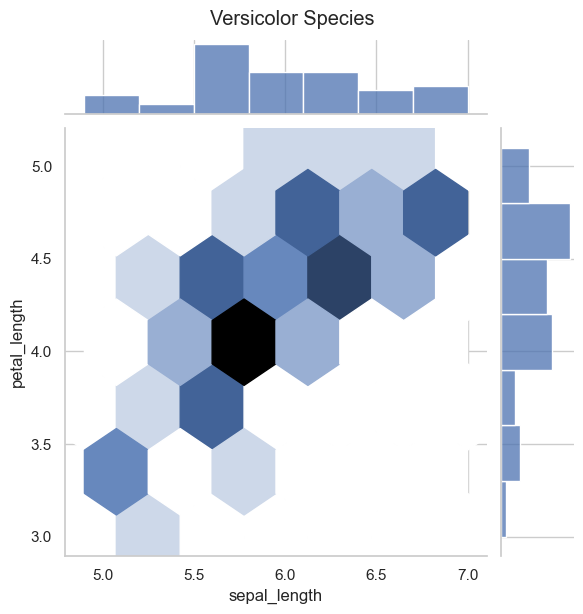

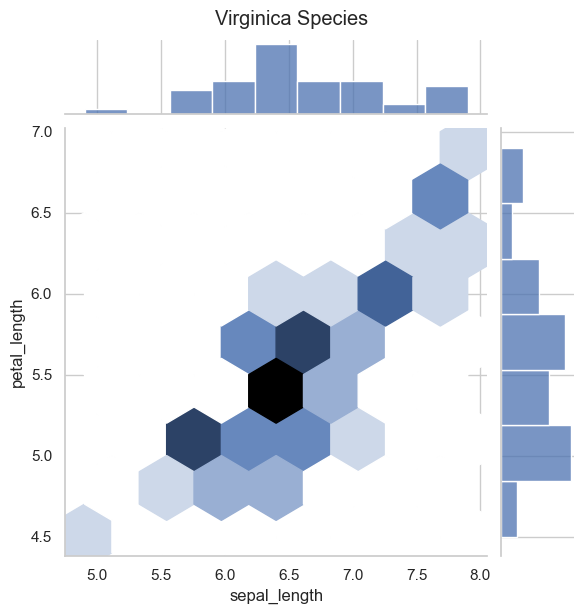

In [89]:
# 设置图形风格
sns.set(style="whitegrid")

# 根据不同的物种分别绘制六边形箱图
sns.jointplot(x=data[data['species']=='setosa']['sepal_length'], y=data[data['species']=='setosa']['petal_length'], kind='hex')
plt.suptitle('Setosa Species', y=1.02)

sns.jointplot(x=data[data['species']=='versicolor']['sepal_length'], y=data[data['species']=='versicolor']['petal_length'], kind='hex')
plt.suptitle('Versicolor Species', y=1.02)

sns.jointplot(x=data[data['species']=='virginica']['sepal_length'], y=data[data['species']=='virginica']['petal_length'], kind='hex')
plt.suptitle('Virginica Species', y=1.02)

评论：
不做评价

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [64]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


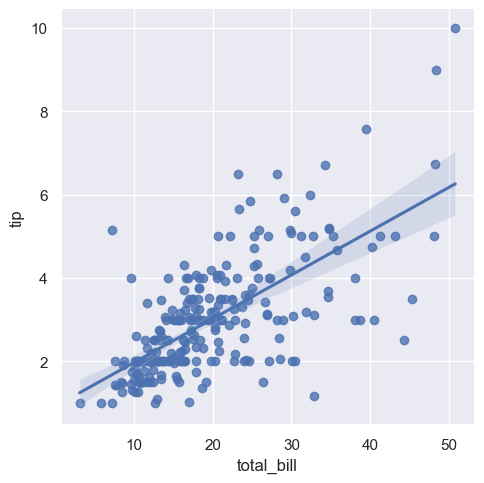

In [6]:
# 练习3-1
# 绘制散点图
sns.lmplot(x='total_bill', y='tip', data=data) # confidence interval

评价：
小费和总小费之间存在较高线性关系

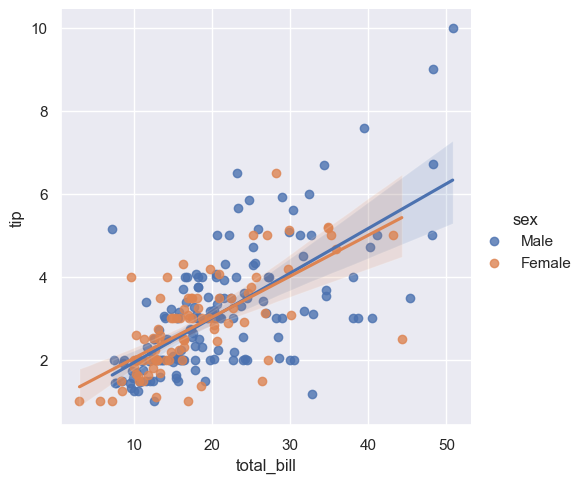

In [8]:
# 练习3-2
# 男性顾客和女性顾客，谁更慷慨
sns.lmplot(x="total_bill", y="tip", hue="sex", data=data)

评论：
男性略微更加慷慨，女性置信区间更宽，给的小费变化更大

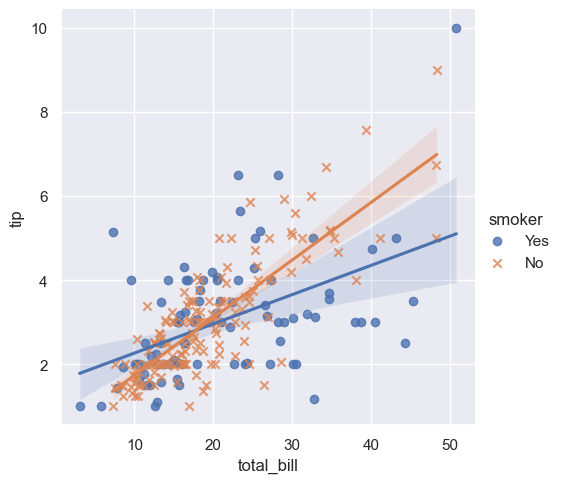

In [10]:
# 练习3-3
# 抽烟与否是否会对小费金额产生影响
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=data
           , markers=["o", "x"]) # markers 标记区分

评论：
在总费用高的时候，不抽烟的人给的更多一些，在总费用少的时候，抽烟的人给的钱多一些，抽烟的人置信区间更宽。

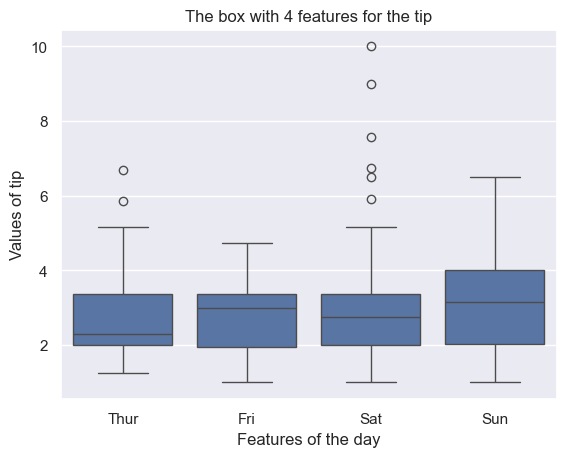

In [31]:
# 练习3-4
# 工作日和周末，什么时候顾客给的小费更慷慨
name1 = 'day'
name2 = 'tip'
sns.boxplot(data=data, x=name1, y=name2) 
# "count": 表示小提琴图的宽度会根据每个分类中的观测数量进行缩放。这样可以更好地展示数据的密度分布。
# "area"：小提琴图的宽度由每个小提琴的数据点的数量进行缩放，而不是总的观测数量。
# "width"：小提琴图的宽度是相对固定的，不会根据观测数量而缩放。
# 添加标题
plt.title('The box with 4 features for the tip')
# 设置横纵坐标标题
plt.xlabel('Features of the ' + name1)
plt.ylabel('Values of tip')
# 显示图形
plt.show()

评论：
从图中可以看到到周末的小费上限会高一些，总体来说分布偏差不多。可能Fri和Sun中位数水平要比Thur和Sat稍高

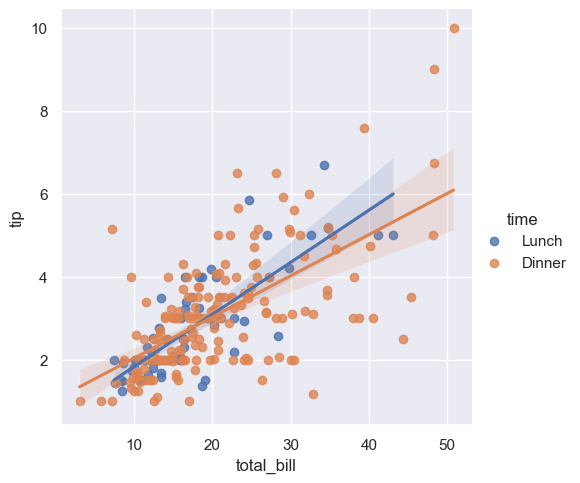

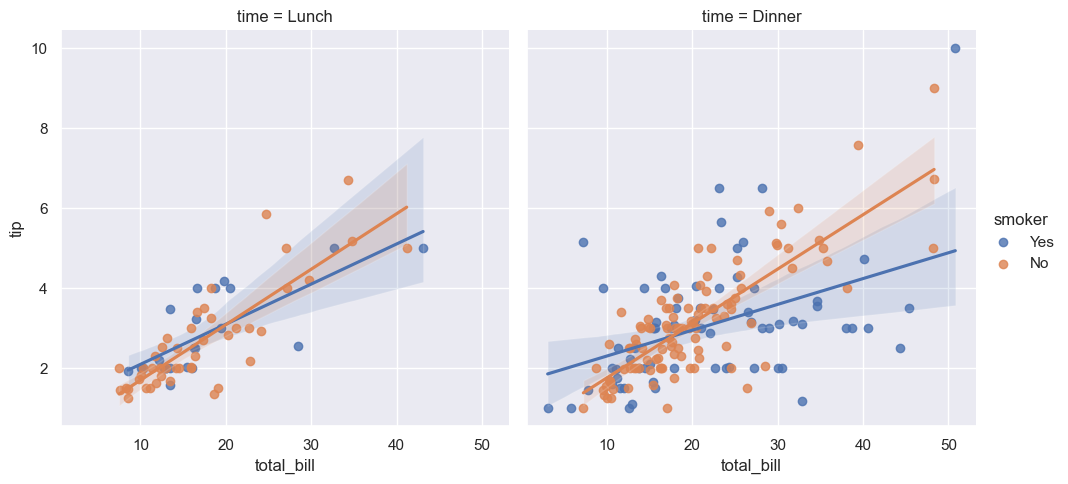

In [13]:
# 练习3-5
# 午饭和晚饭，哪一顿顾客更愿意给小费
# col表示不同列
sns.lmplot(x="total_bill", y="tip", hue="time", data=data)
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=data) 
# col: column

评价：
总体看在Dinner时间段的小费会少于Lunch时间段的小费，不抽烟的人给的也相对多一些

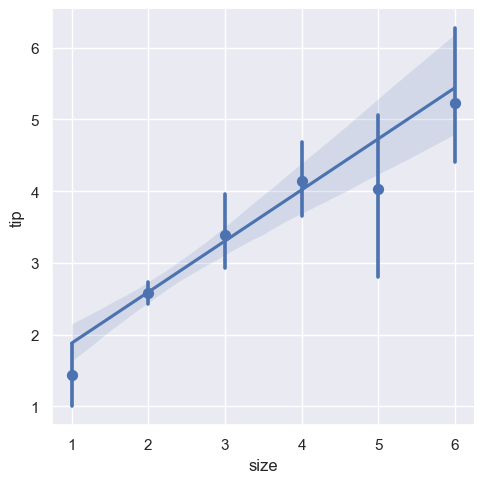

In [7]:
# 练习3-6
# 就餐人数是否会对慷慨度产生影响
sns.lmplot(x="size", y="tip", data=data, x_estimator=np.mean)

评论：
size显著与小费相关，size越大，小费越多

In [66]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [69]:
# 练习3-7
# 性别+抽烟的组合因素对慷慨度的影响
pivot_result = data.pivot_table(values='tip', index='sex', columns='smoker', aggfunc='mean')
# type(pivot_result)
pivot_result

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


In [71]:
# 将 pivot_result 转换成长格式的 DataFrame
pivot_result_long = pivot_result.reset_index().melt(id_vars='sex', var_name='smoker', value_name='tip')
pivot_result_long

,sex,smoker,tip
0,Male,Yes,3.051167
1,Female,Yes,2.931515
2,Male,No,3.113402
3,Female,No,2.773519


<Axes: xlabel='sex', ylabel='tip'>

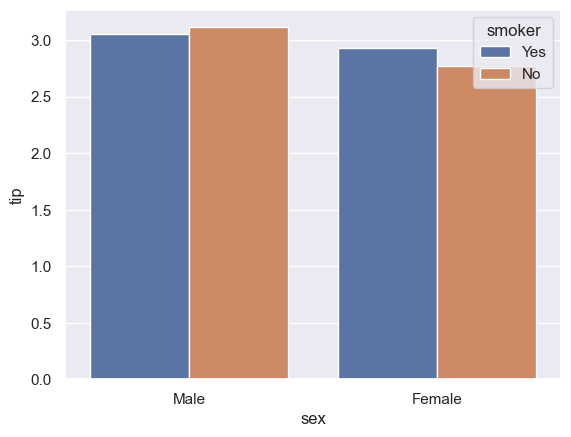

In [72]:
# 对得到的pivot_result数据进行绘制
sns.barplot(x="sex", y="tip", hue="smoker", data=pivot_result_long) 

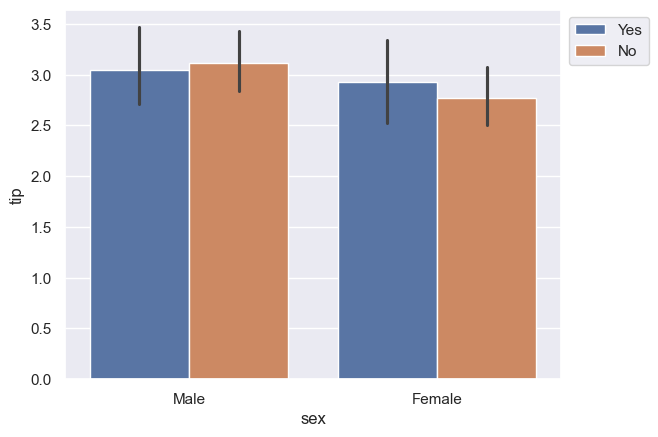

In [79]:
# sns是默认直接进行平均计算的，所以也可以直接画
sns.barplot(x="sex", y="tip", hue="smoker", data=data) 
# 调整图例的位置
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 可以根据需要调整位置，比如 'upper left', 'lower right', 'center', 等等

评论：
从中可以看出，Male付的小费平均更多。Male抽烟的平均给的小费少于不抽烟给的小费，Female抽烟的平均给的小费大于不抽烟给的小费

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [16]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [86]:
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1，下面bottom参数表示纵向从哪里开始画
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置

        survived  unsurvived  total  total  survived_prop  unsurvived_prop
pclass                                                                    
1            136          80    216    216       0.629630         0.370370
2             87          97    184    184       0.472826         0.527174
3            119         372    491    491       0.242363         0.757637


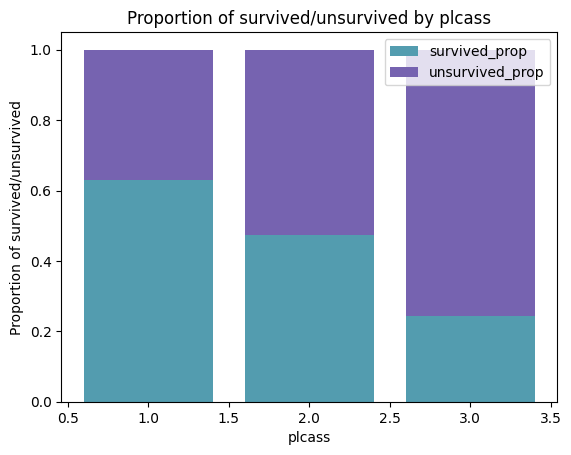

In [87]:
# 练习4-1
# 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
# 计算存活和非存活比例
result = data.groupby('pclass')['survived'].agg(['sum', 'count'])
result['unsurvived'] = result['count'] - result['sum']
result['total'] = result['sum'] + result['unsurvived']
result['survived_prop'] = result['sum'] / result['total']
result['unsurvived_prop'] = result['unsurvived'] / result['total']
# 重新组织结果
result = result.rename(columns={'sum': 'survived', 'count': 'total'})[['survived', 'unsurvived', 'total', 'survived_prop', 'unsurvived_prop']]
print(result)

name1 = 'plcass'
name2 = ['survived_prop', 'unsurvived_prop']
stackedbarplot(x_data = result.index.values
               , y_data_list = [result[name2[0]], result[name2[1]]]
               , y_data_names = [name2[0], name2[1]]
               , colors = ['#539caf', '#7663b0']
               , x_label = name1
               , y_label = 'Proportion of survived/unsurvived'
               , title = 'Proportion of survived/unsurvived by ' + name1)

注：原文档中的total有点怪,导致结果也有问题

        survived  unsurvived  total  total  survived_prop  unsurvived_prop
sex                                                                       
female       233          81    314    314       0.742038         0.257962
male         109         468    577    577       0.188908         0.811092


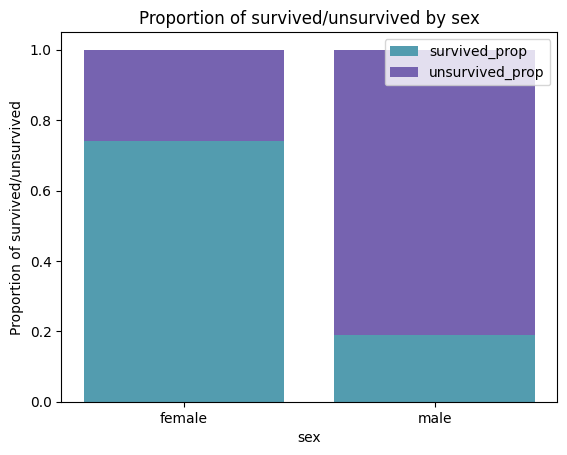

In [88]:
# 练习4-2
# 不同性别的幸存比例（提示：箱图或者提琴图）
# 计算存活和非存活比例
result = data.groupby('sex')['survived'].agg(['sum', 'count'])
result['unsurvived'] = result['count'] - result['sum']
result['total'] = result['sum'] + result['unsurvived']
result['survived_prop'] = result['sum'] / result['total']
result['unsurvived_prop'] = result['unsurvived'] / result['total']
# 重新组织结果
result = result.rename(columns={'sum': 'survived', 'count': 'total'})[['survived', 'unsurvived', 'total', 'survived_prop', 'unsurvived_prop']]
print(result)

name1 = 'sex'
name2 = ['survived_prop', 'unsurvived_prop']
stackedbarplot(x_data = result.index.values
               , y_data_list = [result[name2[0]], result[name2[1]]]
               , y_data_names = [name2[0], name2[1]]
               , colors = ['#539caf', '#7663b0']
               , x_label = name1
               , y_label = 'Proportion of survived/unsurvived'
               , title = 'Proportion of survived/unsurvived by ' + name1)

C:\Users\Ultimator\AppData\Local\Temp\ipykernel_49332\2713943609.py:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=data, x=name1, y=name2, scale="count")


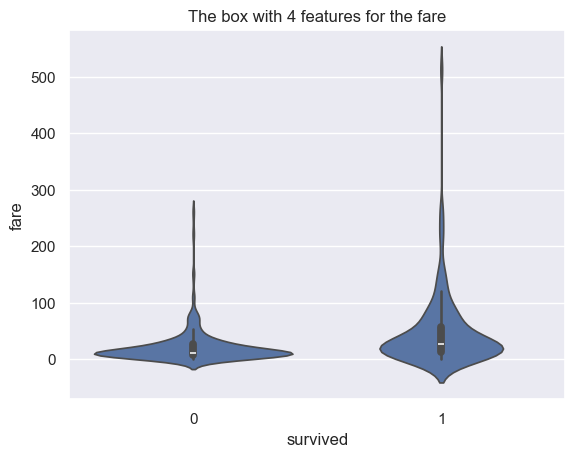

In [24]:
# 练习4-3
# 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
# 分一下类
name1 = 'survived'
name2 = 'fare'
sns.violinplot(data=data, x=name1, y=name2, scale="count") 
# "count": 表示小提琴图的宽度会根据每个分类中的观测数量进行缩放。这样可以更好地展示数据的密度分布。
# "area"：小提琴图的宽度由每个小提琴的数据点的数量进行缩放，而不是总的观测数量。
# "width"：小提琴图的宽度是相对固定的，不会根据观测数量而缩放。
# 添加标题
plt.title('The box with 4 features for the ' + name2)
# 显示图形
plt.show()

C:\Users\Ultimator\AppData\Local\Temp\ipykernel_49332\38954640.py:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=data, x=name1, y=name2, scale="count")


Text(0.5, 1.0, 'The box with 2 features for the age')

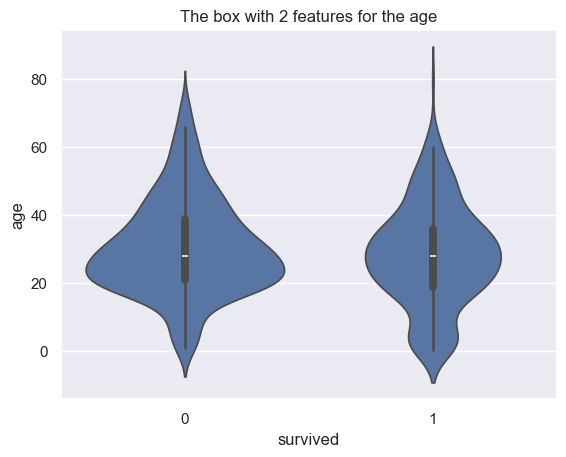

In [23]:
# 练习4-4
# 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
name1 = 'survived'
name2 = 'age'
sns.violinplot(data=data, x=name1, y=name2, scale="count") 
# "count": 表示小提琴图的宽度会根据每个分类中的观测数量进行缩放。这样可以更好地展示数据的密度分布。
# "area"：小提琴图的宽度由每个小提琴的数据点的数量进行缩放，而不是总的观测数量。
# "width"：小提琴图的宽度是相对固定的，不会根据观测数量而缩放。
# 添加标题
plt.title('The box with 2 features for the ' + name2)
# 显示图形
plt.show()

In [51]:
# 练习4-5
# 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.9
    ind_width = total_width / len(y_data_list)
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    x_data_value = list(range(1, len(x_data) + 1))
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data_value + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    
    ax.set_xticks(x_data_value)
    ax.set_xticklabels(x_data)
    # 将ax图片的一些设置加上
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    # 就改一下legend位置
    ax.legend(loc = 'upper left')


pivot_result = data.pivot_table(index='embarked', columns='pclass', aggfunc='size', fill_value=0)
pivot_result

pclass,1,2,3
embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


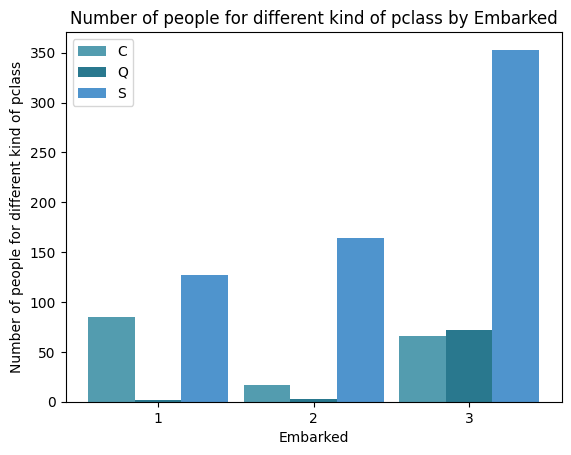

In [52]:
groupedbarplot(x_data = pivot_result.columns.tolist()
               , y_data_list = [pivot_result.loc[index_em].tolist() for index_em in pivot_result.index]
               , y_data_names = pivot_result.index.tolist()
               , colors = ['#539caf', '#29788E', '#4F94CD']
               , x_label = 'Embarked'
               , y_label = 'Number of people for different kind of pclass'
               , title = 'Number of people for different kind of pclass by Embarked')

注：文档里这幅图有点问题，数据和图对不上。

<Axes: xlabel='survived', ylabel='sibsp'>

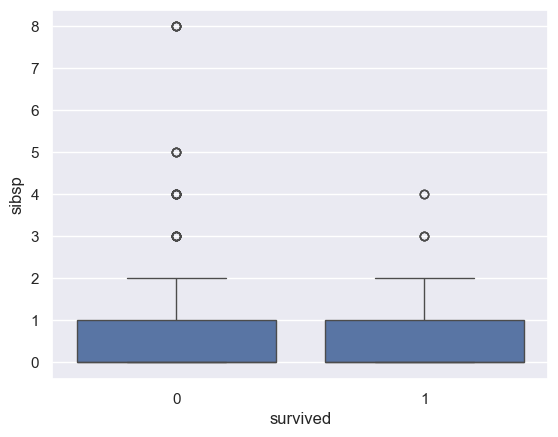

In [19]:
# 练习4-6
# 幸存和遇难乘客堂兄弟姐妹的数量分布
# 分一下类
name1 = 'survived'
name2 = 'sibsp'
sns.boxplot(data=data, x=name1, y=name2)

<Axes: xlabel='survived', ylabel='parch'>

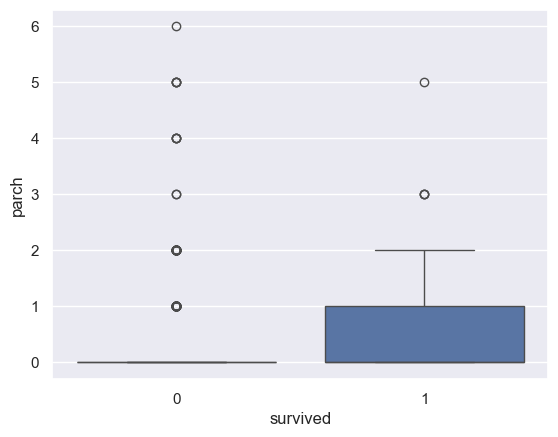

In [18]:
# 练习4-7
# 幸存和遇难乘客父母子女的数量分布
# 分一下类
name1 = 'survived'
name2 = 'parch'
sns.boxplot(data=data, x=name1, y=name2)

In [54]:
# 练习4-8
# 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）
pivot_result = data.pivot_table(index='alone', columns='survived', aggfunc='size', fill_value=0)
pivot_result

survived,0,1
alone,,
False,175,179
True,374,163


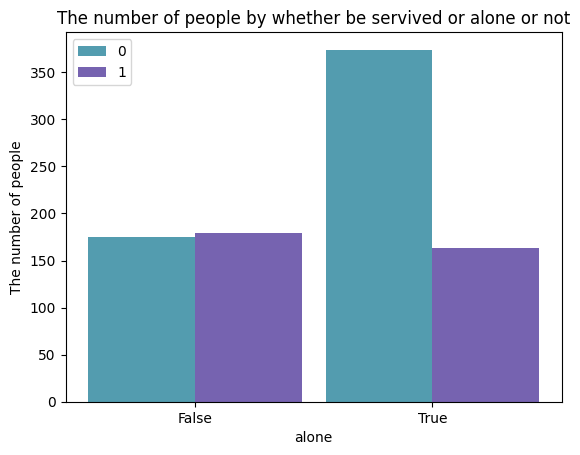

In [58]:
groupedbarplot(x_data = pivot_result.index.tolist()
               , y_data_list = [pivot_result.loc[:, col].tolist() for col in pivot_result.columns]
               , y_data_names = pivot_result.columns.tolist()
               , colors = ['#539caf', '#7663b0']
               , x_label = 'alone'
               , y_label = 'The number of people'
               , title = 'The number of people by whether be servived or alone or not')